In [91]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [92]:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

1) Plot of first 9 images in training datasets

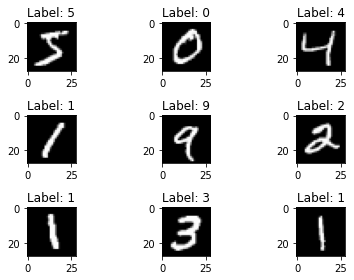

In [93]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_digits[i], cmap=plt.get_cmap('gray'))
 plt.title("Label: " + str(train_labels[i]))
plt.tight_layout()
# show the figure
plt.show()



2) Preparing the data by reshaping it and assgining the training labels to differen categories corresponding to each digit

In [94]:
train_digits = train_digits.reshape(60000,28,28,1) 
train_labels = tf.keras.utils.to_categorical(train_labels,10)  

In [95]:
test_digits = test_digits.reshape(10000,28,28,1) 
test_labels = tf.keras.utils.to_categorical(test_labels,10)  

3) Build your CNN model with Conv2D with (3, 3) filters and MaxPooling2D((2, 2)). Show the 
summary of your model.

In [96]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [97]:
##Summary of the model

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-tra

In [98]:
##Adding dense layers on top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [99]:
#complete architecture of our model.

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 576)             

4) Compile  and  train  your  model.  Consider  the  choices  of  optimizer,  loss,  and  epochs.  What  are  
your accuracy and val_accuracy?

In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_digits, train_labels, epochs=10, 
                    validation_data=(test_digits, test_labels))

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2799 - accuracy: 0.9443 - val_loss: 0.0559 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0537 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0449 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0476 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0320 - accuracy: 0.9905 - val_loss: 0.0378 -

5) Plot the history of model training against epoch. 

313/313 - 2s - loss: 0.0568 - accuracy: 0.9878 - 2s/epoch - 8ms/step


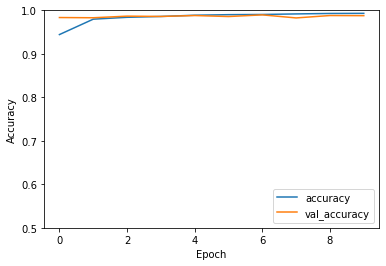

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#train_loss, train_acc = model.evaluate(train_digits,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

6) Evaluate the model with the test data. 

In [119]:
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.0568 - accuracy: 0.9878 - 3s/epoch - 9ms/step
0.9878000020980835


the trained model give an accuracy of 98%